Text(0.5, 0, 'slope, k')

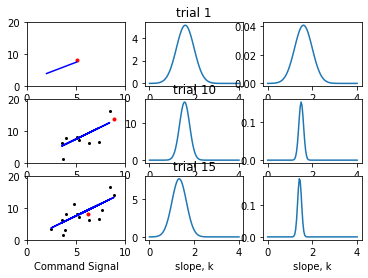

In [1]:
from scipy.stats import uniform, norm
import matplotlib.pyplot as plt
import numpy as np


#Command signal at eah trial drawn from unifrm distribution
a = 2
b = 10
delta = b-a
n_trials = 15
signal = uniform.rvs(loc = a, scale = delta, size = n_trials)

#Noisy sensory observation of force on each trial
std = 2
true_k = 1.5
f_obs = norm.rvs(loc = true_k * signal, scale = std)

#an array for different slope values, k
slope_size = 100
slope = np.linspace(0,4,slope_size)

#instantenous likelihoods
ins_likelihood = np.empty((n_trials, slope_size))
for i in np.arange(0,n_trials):
    ins_likelihood[i] = signal[i]*norm.pdf(slope, loc = f_obs[i]/signal[i], scale = std/signal[i])

posterior = np.empty((n_trials, slope_size))
posterior[0] = ins_likelihood[0]
posterior[0] /= np.sum(posterior[0])
for i in np.arange(1, n_trials):
    posterior[i] = posterior[i-1] * ins_likelihood[i]
    posterior[i] /= np.sum(posterior[i])

s = signal
slope_pm = signal/f_obs
s_new = [2,signal[0]]
s_new_y = [4,signal[0]*true_k]

fig, axes = plt.subplots(3,3)
for i in [0,1,2]:
    axes[i][0].set_xlim(0,10)
    axes[i][0].set_ylim(0,20)
    
axes[0][1].set_title('trial 1')
axes[0][0].plot(signal[0],f_obs[0], 'ro', markersize = 3)
axes[0][0].plot(s_new, s_new_y, color = 'blue')
axes[0][1].plot(slope, ins_likelihood[0])
axes[0][2].plot(slope, posterior[0])

axes[1][1].set_title('trial 10')
axes[1][0].plot(signal[0:8],f_obs[0:8], 'ko', markersize = 2)
axes[1][0].plot(signal[9], f_obs[9], 'ro', markersize = 3)
axes[1][0].set_xlabel('Command Signal')
axes[1][0].plot(s[0:9], s[0:9]*true_k, color = 'blue')
axes[1][1].plot(slope, ins_likelihood[9])
axes[1][1].set_xlabel('slope, k')
axes[1][2].plot(slope, posterior[9])
axes[1][2].set_xlabel('slope, k')

axes[2][1].set_title('trial 15')
axes[2][0].plot(signal[0:13],f_obs[0:13], 'ko', markersize = 2)
axes[2][0].plot(signal[14], f_obs[14], 'ro', markersize = 3)
axes[2][0].set_xlabel('Command Signal')
axes[2][0].plot(s[0:14], s[0:14]*true_k, color = 'blue')
axes[2][1].plot(slope, ins_likelihood[14])
axes[2][1].set_xlabel('slope, k')
axes[2][2].plot(slope, posterior[14])
axes[2][2].set_xlabel('slope, k')

In here, as we see according to number of trials are increased the posterior distribution gets less varied and more precise. This also makes intuitive sense since the toddler learns her power distribution with experience and learns more on to act accordingly. Trials makes her more proficient in estimating her muscle power according to input she gets from the environment